Inportant notes: 
!! W (big w) represents w vector
!! X (big x) represents x vector 
!! D (big d) represents derivative vector
!! x_a^(i) : a th future of i th x 
For instance: We have 4 futures named as house square, bedroom number, floor number and house age;
x_2^(1) : First x's secound future so bedroom number (On coding we start counting from 0!)

For multiple variables we rewrite our functions as:
f_w,b(x) = w_1 * x_1 + w_2 * x_2 * w_3 * x_3 ... w_n * x_n + b
 W = [w_1, w_2, w_3 ... w_n]
 X = [x_1, x_2, x_3 ... x_n]
 b is a number
so this funtion can be writable as : f_w,b(x) = W . X + b (Dot product)

Gradient Descent:
D = [d_1, d_2, d_3 ... d_n]
w_j --> w_j - 0.1*d_j for any defined j
so it can writable as: W --> W - 0.1 * D


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Creating Dataset

In [2]:
# 0- Square 1000 feets
# 1- Bedroom number
# 2- Floor number
# 3- Age
x = np.array([
    [1.3 ,1 ,1 ,10],
    [1.4 ,1 ,1 ,7],
    [1.6 ,2 ,2 ,21],
    [1.9 ,1 ,1 ,33],
    [2.2 ,3 ,1 ,9],
    [2.5 ,4 ,1 ,26],
    [2.7 ,2 ,2 ,3],
    [2.9 ,3 ,2 ,12],
    [3.1 ,4 ,1 ,20],
    [3.4 ,5 ,2 ,34]
])
# Prices (10,000s $)
y = np.array([12, 20 ,15, 21 , 27 , 30 , 26, 35 , 36 , 38])

In [3]:
# Rescaling age feature by divide by 10 to compute and observe easily
x[:, -1] /= 10
print(x)

[[1.3 1.  1.  1. ]
 [1.4 1.  1.  0.7]
 [1.6 2.  2.  2.1]
 [1.9 1.  1.  3.3]
 [2.2 3.  1.  0.9]
 [2.5 4.  1.  2.6]
 [2.7 2.  2.  0.3]
 [2.9 3.  2.  1.2]
 [3.1 4.  1.  2. ]
 [3.4 5.  2.  3.4]]


Visualing all features

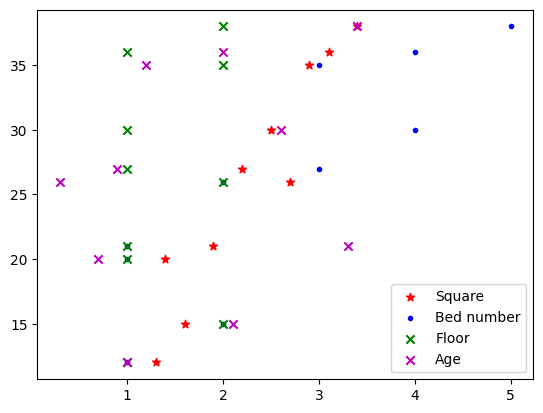

In [4]:
plt.scatter(x[:,0],y, marker='*', c='r', label = "Square")
plt.scatter(x[:,1],y, marker='.', c='b', label = "Bed number")
plt.scatter(x[:,2],y, marker='x', c='g', label = "Floor")
plt.scatter(x[:,3],y, marker='x', c='m', label = "Age")
plt.xlabel = "Square (1000 feets)"
plt.ylabel = "Price (10000s $)"
plt.legend()
plt.show()

Now time to making a prediction model by linear regression with multi variables (4 features on that case)

In [5]:
# Defining function
def f_wb(x,w,b): # Takes 2 vectors (x and w) and a scaler (b) 
    # Returns a scaler
    return np.dot(x, w) + b

In [6]:
def cost_function (x ,y , w, b): # Takes 3 vectors (x, y and w) and a scaler (b) 
    # Return a scaler
    m = len(x)
    cost = np.sum(((f_wb(x,w,b)) - y)**2) # Logic is same with making a loop but sum method is more optimized and efficient
    return cost / (2*m)

In [7]:
def gradient_compute(x, y, w, b): # Takes 3 vectors (x, y and w) and a scaler (b)
     # Return one vector and one scaler
     m = len(x)
     dj_dw = np.dot((f_wb(x, w,b) - y),x) / m
     dj_db = np.sum(f_wb(x,w,b)- y) / m
     return dj_dw, dj_db


In [8]:
def gradient_descent(x, y, w, b, alpha= 0.01): # Takes 3 vectors (x, y and w) and two scaler (b and alpha)
    while True:
        tmpw = w
        tmpb = b
        # Getting derivatives
        dj_dw, dj_db = gradient_compute(x, y, w, b)
        
        tmpw -= alpha * dj_dw
        tmpb -= alpha * dj_db
        if tmpb / b <1.0001 and tmpb / b > 0.9999:
            if np.all(tmpw / w < 1.0001) and np.all(tmpw / w > 0.9999):
                break
        
        w = tmpw
        b = tmpb
        
    return w, b

Lets try it out


In [9]:
# Set initial values as 0
initial_w = np.zeros(4)
initial_b = 0
bestw, bestb = gradient_descent(x, y, initial_w, initial_b)
print(bestw)
print(bestb)

[11.82554692  0.65497207 -1.99896334 -0.15742786]
0.17411835971467363


C:\Users\ARES\AppData\Local\Temp\ipykernel_23904\1522813561.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  if tmpb / b <1.0001 and tmpb / b > 0.9999:


#### Lets check it is true
By sketching cost functions graph (J(w,b) versus # iteration graph)

But first we will calculate the cost by using bestw and bestb that we found
 

In [10]:
print(cost_function(x, y, bestw, bestb))

2.5085000082680566


In [11]:
def cost_iter_graph (x, y, w, b, num_iterations = 500, alpha = 0.01): # x, y and w are vecors, b,num_iterations and alpha is scalers
    x_points = np.arange(num_iterations)
    y_points = np.zeros(num_iterations)
    m = len(x)
    
    for i in range(num_iterations):
        y_points[i] = cost_function(x, y, w, b)
        
        # Update w vector and b value
        # To do that we need to go one step further (alpha)
        dj_dw, dj_db = gradient_compute(x, y, w, b)
        w -= alpha * dj_dw 
        b -= alpha * dj_db 
    return x_points, y_points

Sketching graph

0:   2.523352819273917
50:  2.5118854456645794
100: 2.506641174113999
150: 2.503764120725136
200: 2.501838430927303
300: 2.4990715448643925
400: 2.4969531401029164
499: 2.4952507815848737


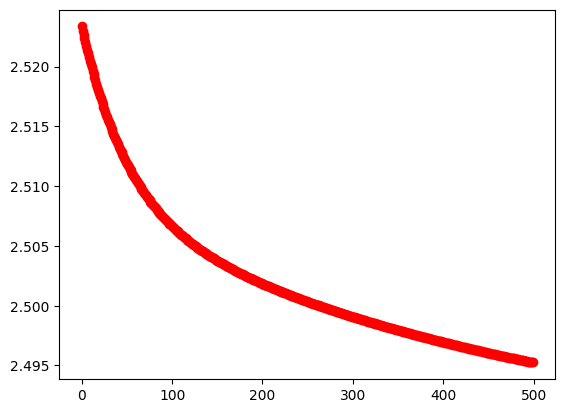

In [12]:
x_points, y_points = cost_iter_graph(x, y, initial_w, initial_b)
# Some checkpoints with exact values
print("0:  ",y_points[0])
print("50: ",y_points[50])
print("100:",y_points[100])
print("150:",y_points[150])
print("200:",y_points[200])
print("300:",y_points[300])
print("400:",y_points[400])
print("499:",y_points[499])
plt.scatter(x_points, y_points, marker="o", c="r")

Our cost on bestw and bestb is (1.5421588155466676e-05) so it is between 400 and 500(499) so it is well, but maybe it can be a little more because we already reach the concav.

You can change the alpha and iteration number to investigate more :)